In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_data = pd.read_csv('/Users/luryan/Documents/persona_project/titanic_dataset/data/train.csv')
test_data = pd.read_csv('/Users/luryan/Documents/persona_project/titanic_dataset/data/test.csv')

y = train_data["Survived"]
X = train_data
y_train = X["Survived"]
X.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

colunas_categoricas = ['Sex', "Embarked"]
X['Embarked'].fillna("S", inplace=True)
X['Embarked'].isnull().sum()



0

In [4]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

X = one_hot_enc.fit_transform(X)
X = pd.DataFrame(X, columns=one_hot_enc.get_feature_names_out())
X = X.fillna(X.median())
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 
    
X

onehotencoder__Sex_female  onehotencoder__Sex_male  \
0                          0.0                      1.0   
1                          1.0                      0.0   
2                          1.0                      0.0   
3                          1.0                      0.0   
4                          0.0                      1.0   
..                         ...                      ...   
886                        0.0                      1.0   
887                        1.0                      0.0   
888                        1.0                      0.0   
889                        0.0                      1.0   
890                        0.0                      1.0   

     onehotencoder__Embarked_C  onehotencoder__Embarked_Q  \
0                          0.0                        0.0   
1                          1.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
886                        0.0                        0.0   
887                        0.0                        0.0   
888                        0.0                        0.0   
889                        1.0                        0.0   
890                        0.0                        1.0   

     onehotencoder__Embarked_S  remainder__Survived  remainder__Pclass  \
0                          1.0                  0.0           1.000000   
1                          0.0                  1.0           0.333333   
2                          1.0                  1.0           1.000000   
3                          1.0                  1.0           0.333333   
4                          1.0                  0.0           1.000000   
..                         ...                  ...                ...   
886                        1.0                  0.0           0.666667   
887                        1.0                  1.0           0.333333   
888                        1.0                  0.0           1.000000   
889                        0.0                  1.0           0.333333   
890                        0.0                  0.0           1.000000   

     remainder__Age  remainder__SibSp  remainder__Parch  remainder__Fare  
0            0.2750             0.125          0.000000         0.014151  
1            0.4750             0.125          0.000000         0.139136  
2            0.3250             0.000          0.000000         0.015469  
3            0.4375             0.125          0.000000         0.103644  
4            0.4375             0.000          0.000000         0.015713  
..              ...               ...               ...              ...  
886          0.3375             0.000          0.000000         0.025374  
887          0.2375             0.000          0.000000         0.058556  
888          0.3500             0.125          0.333333         0.045771  
889          0.3250             0.000          0.000000         0.058556  
890          0.4000             0.000          0.000000         0.015127  

[891 rows x 11 columns]

<Axes: >

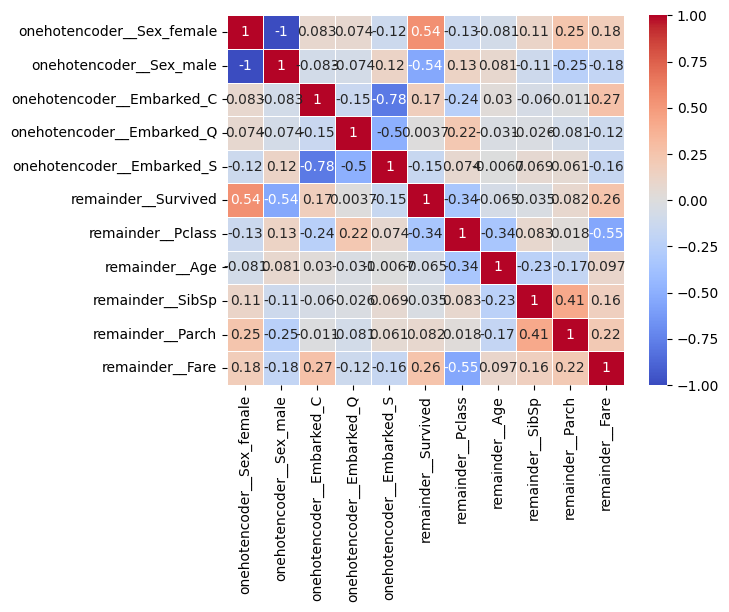

In [7]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

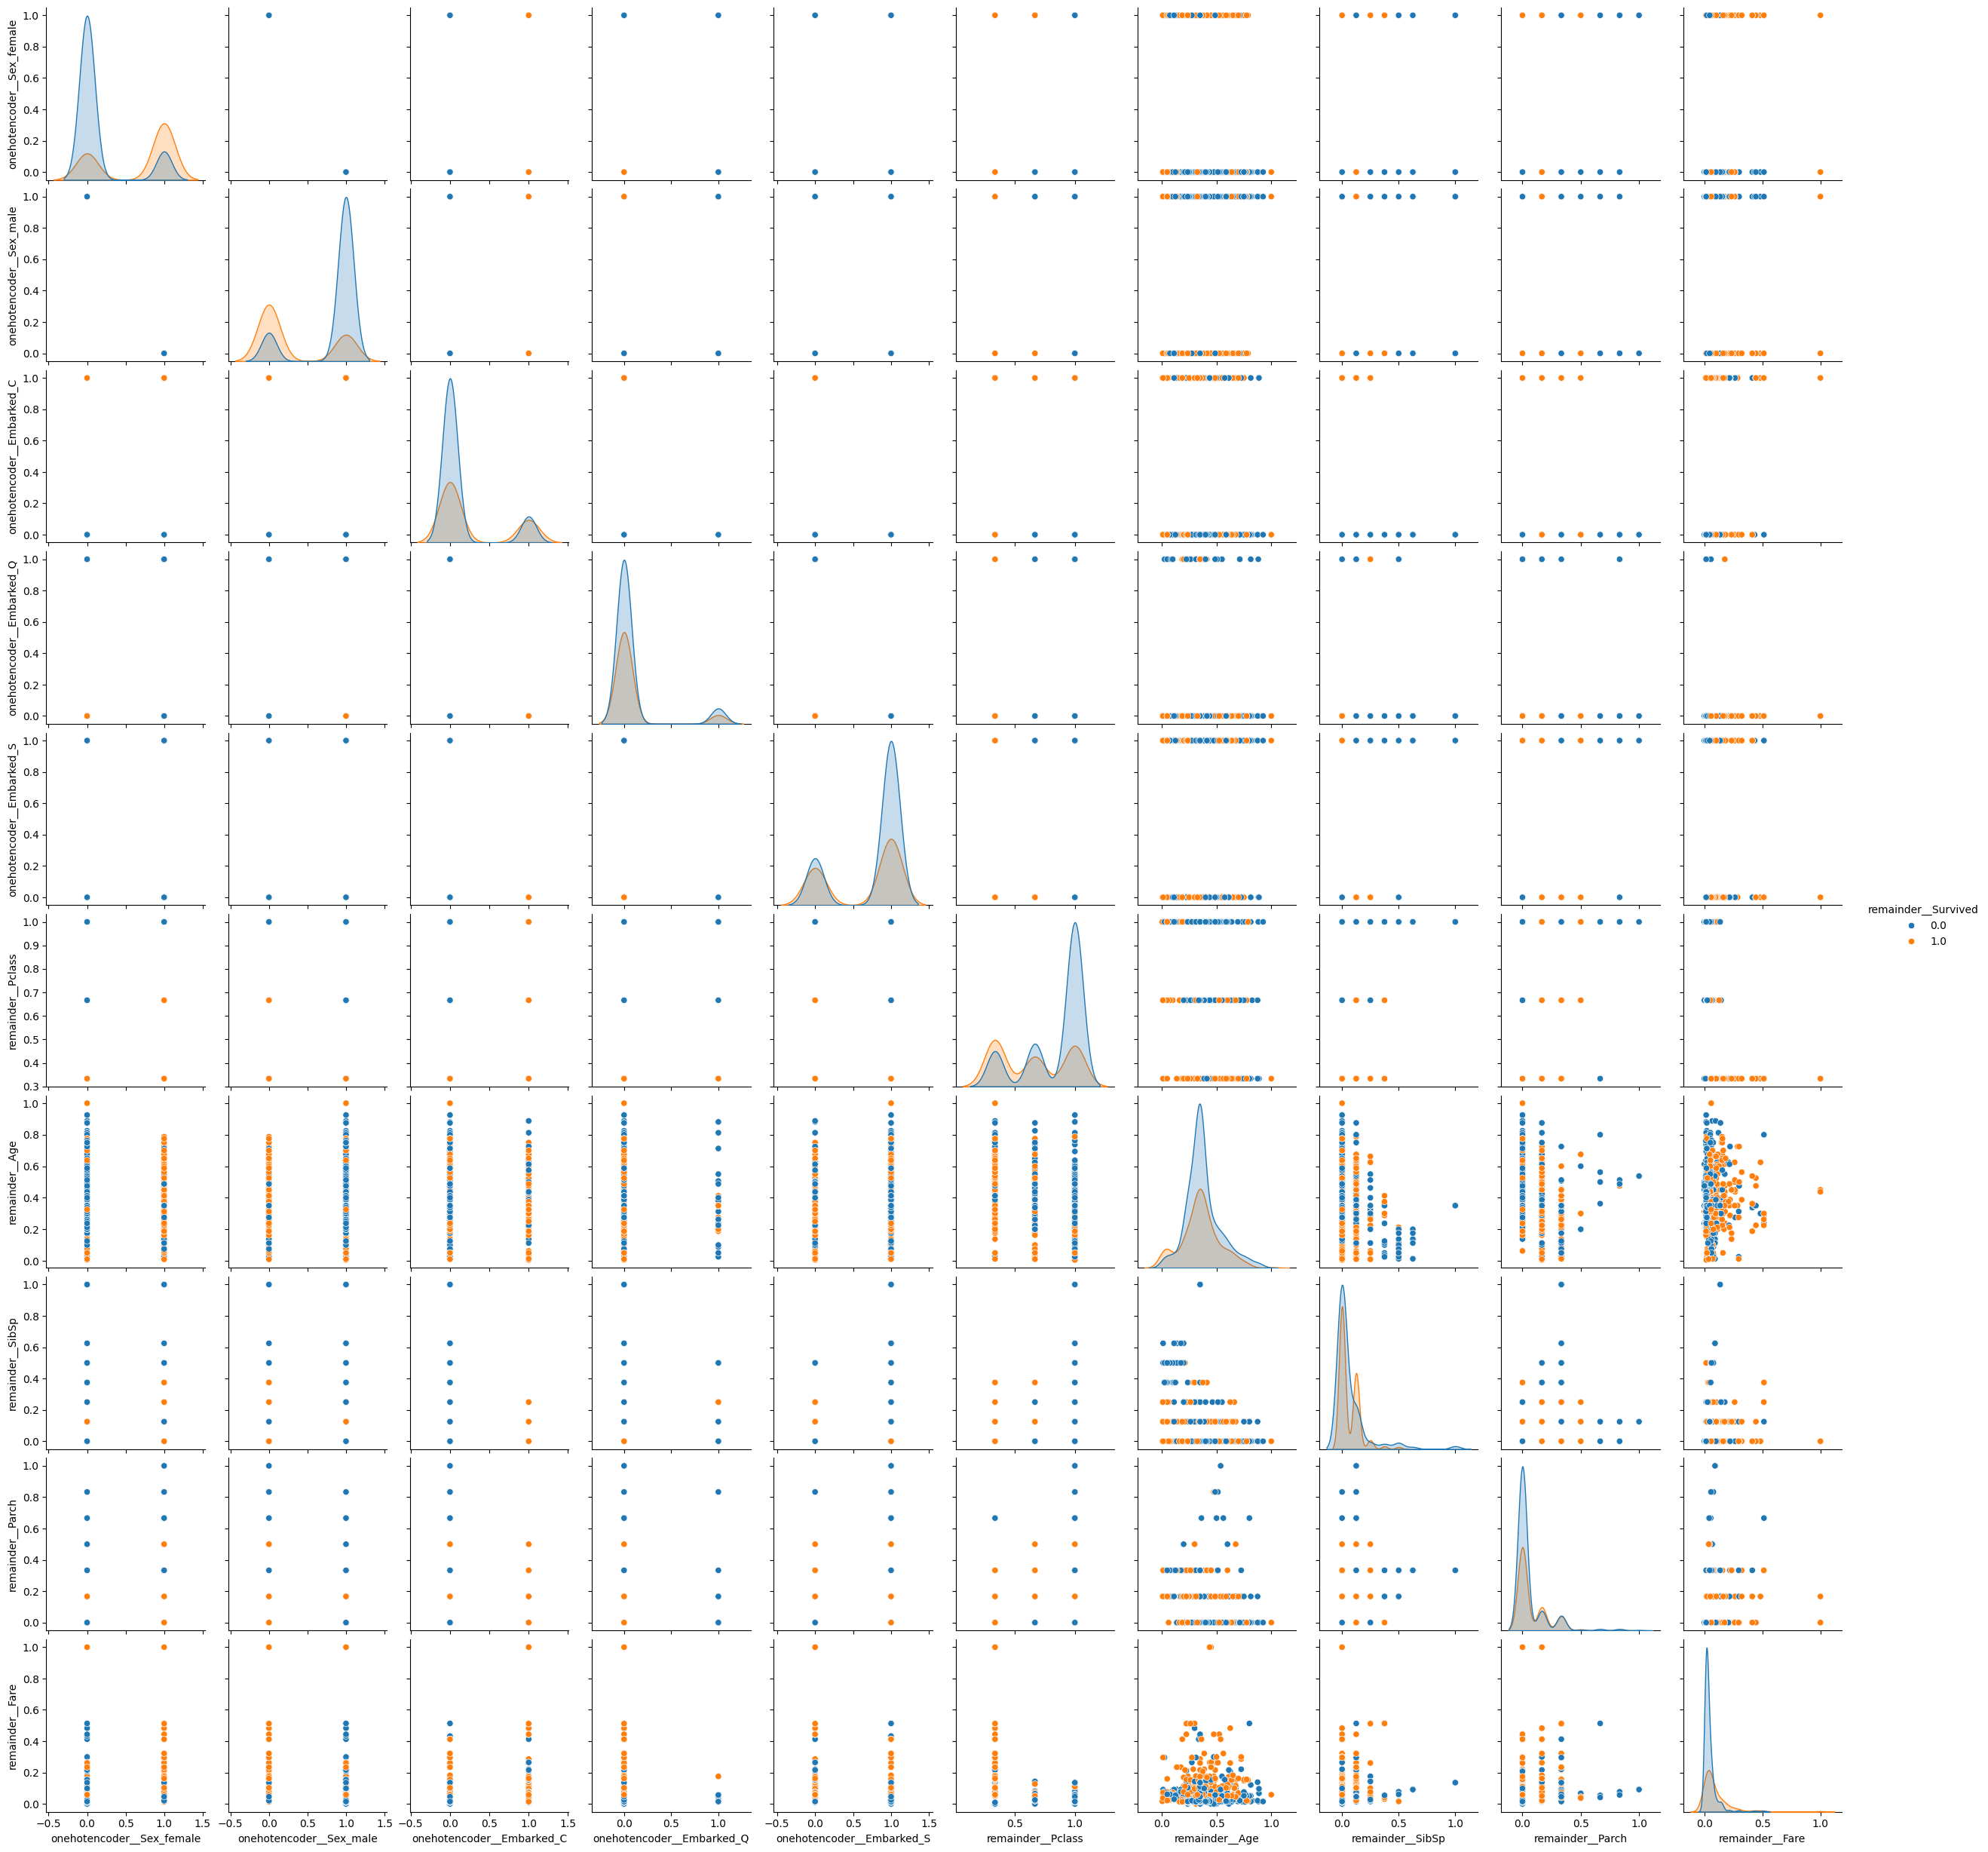

In [6]:
sns.pairplot(X, hue="remainder__Survived")

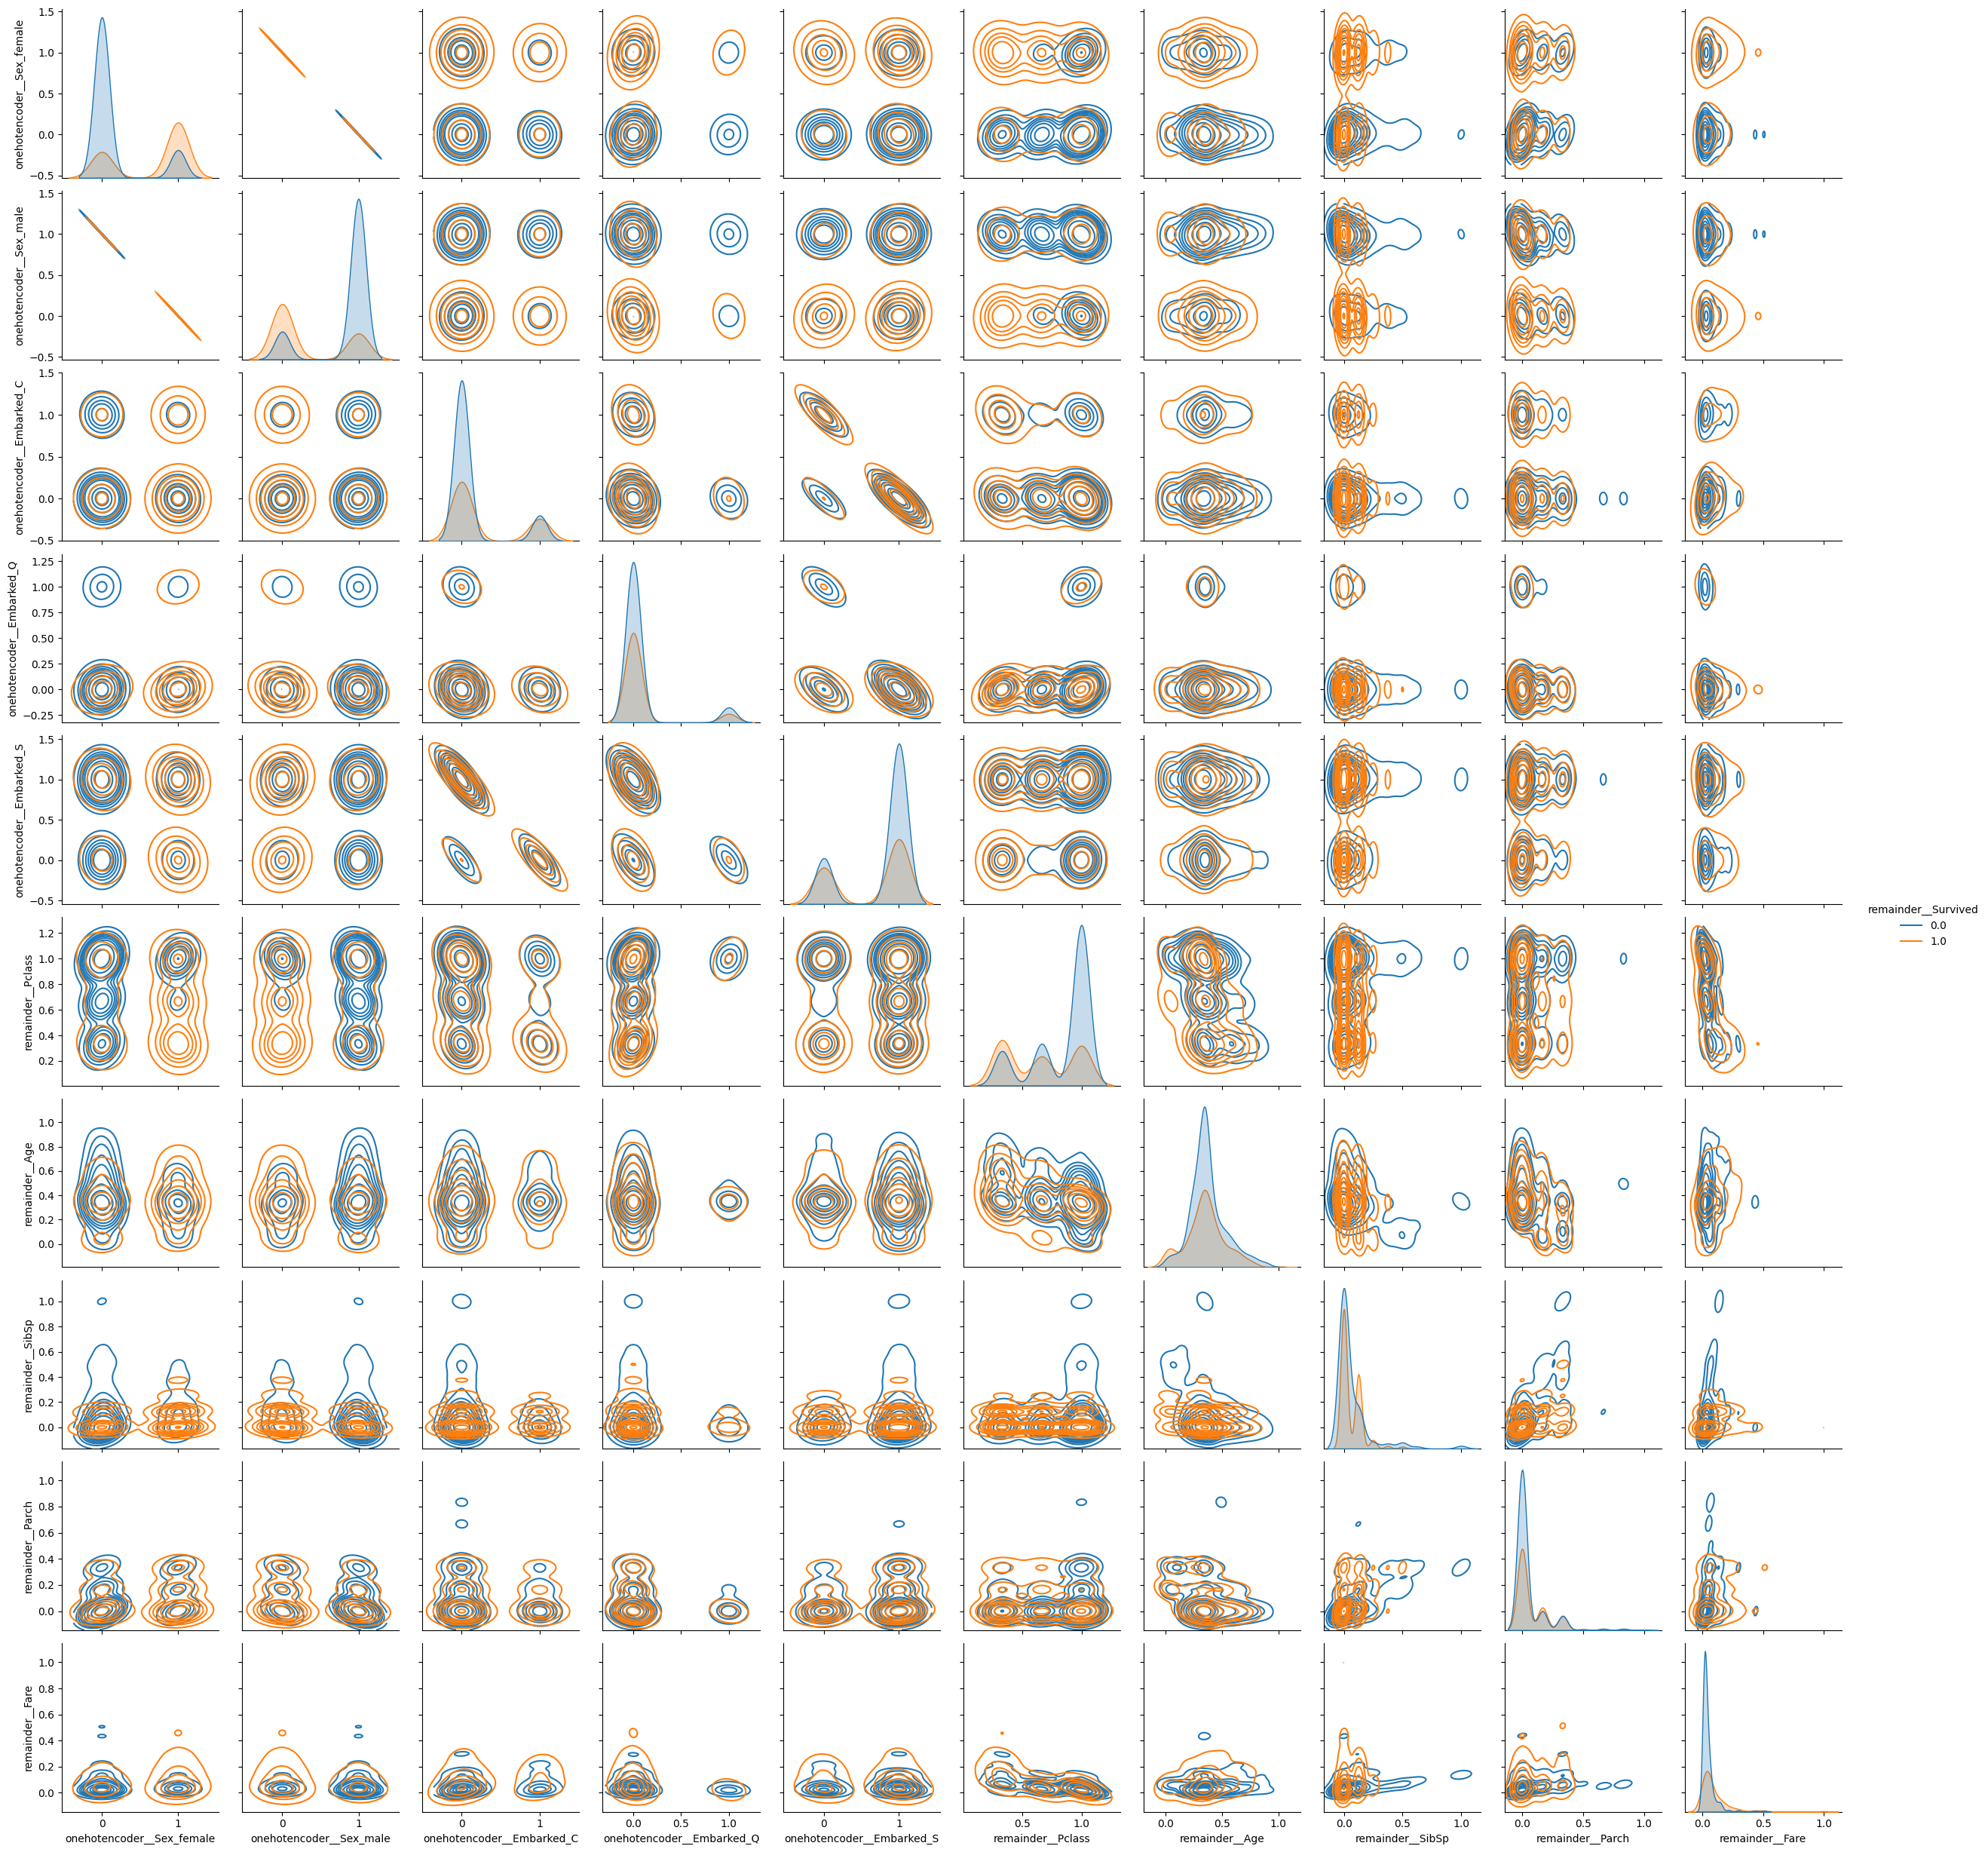

In [8]:
sns.pairplot(X, hue="remainder__Survived", kind='kde')

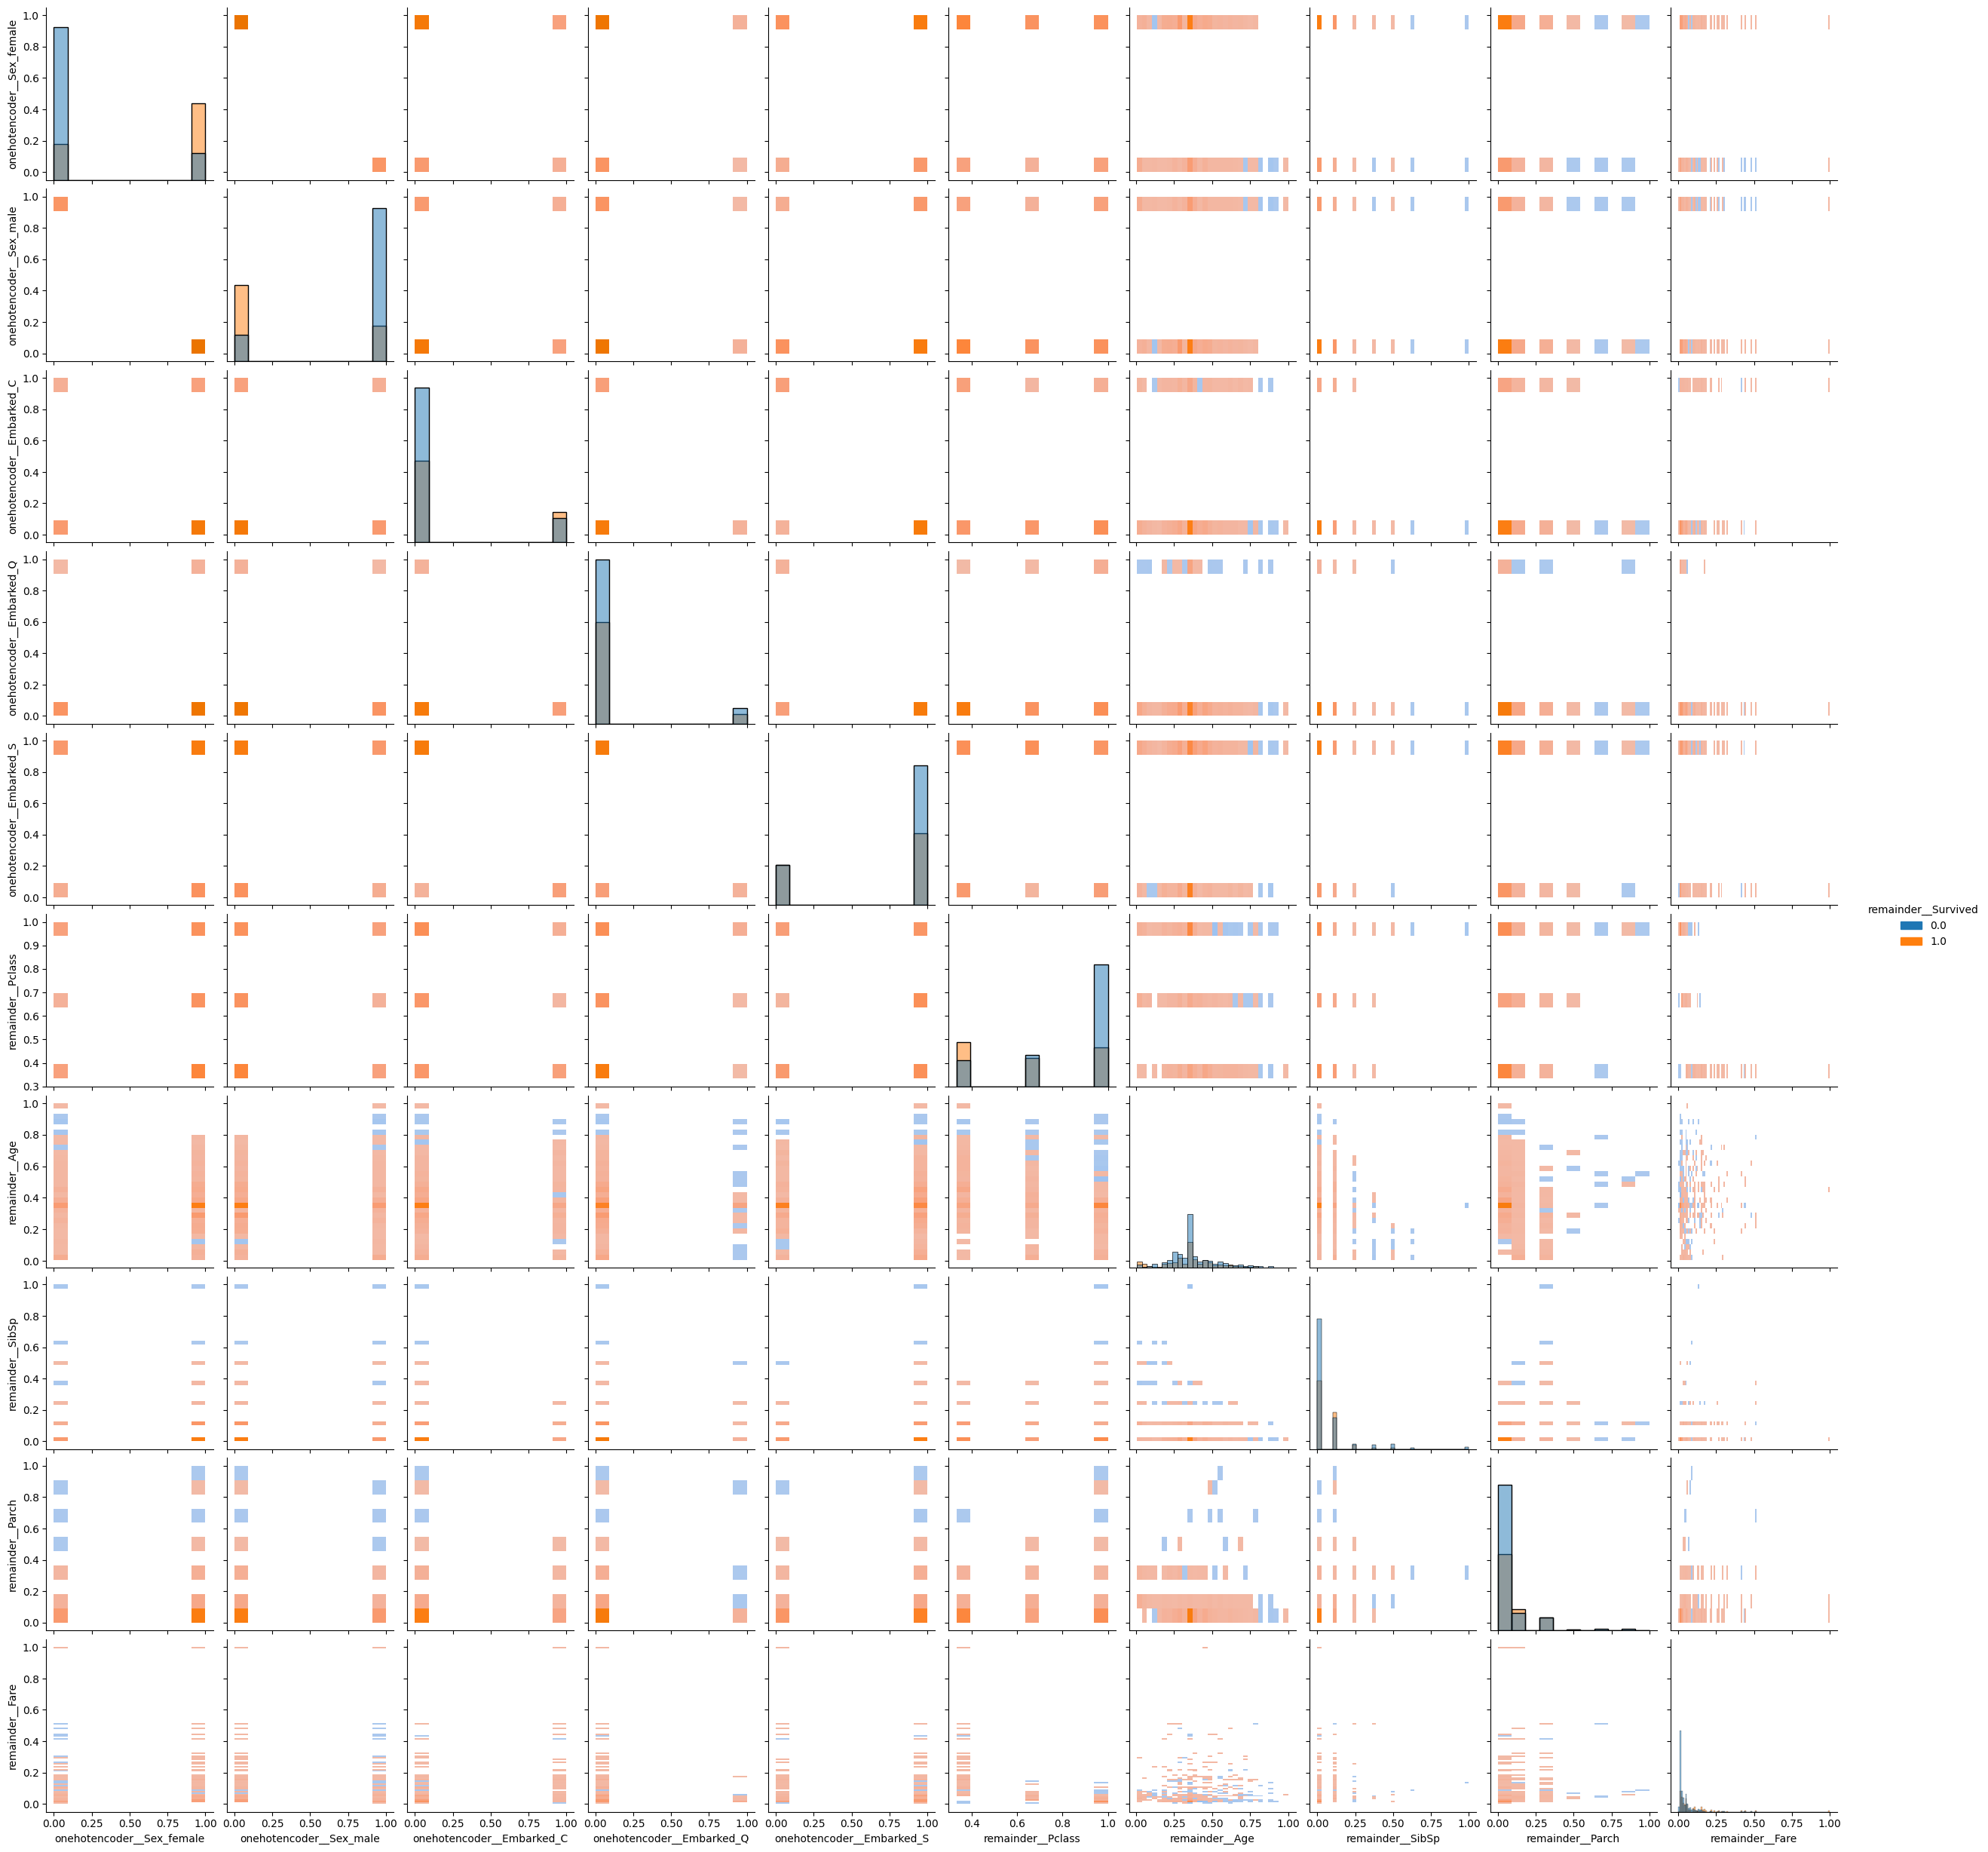

In [9]:
sns.pairplot(X, hue="remainder__Survived", kind='hist')

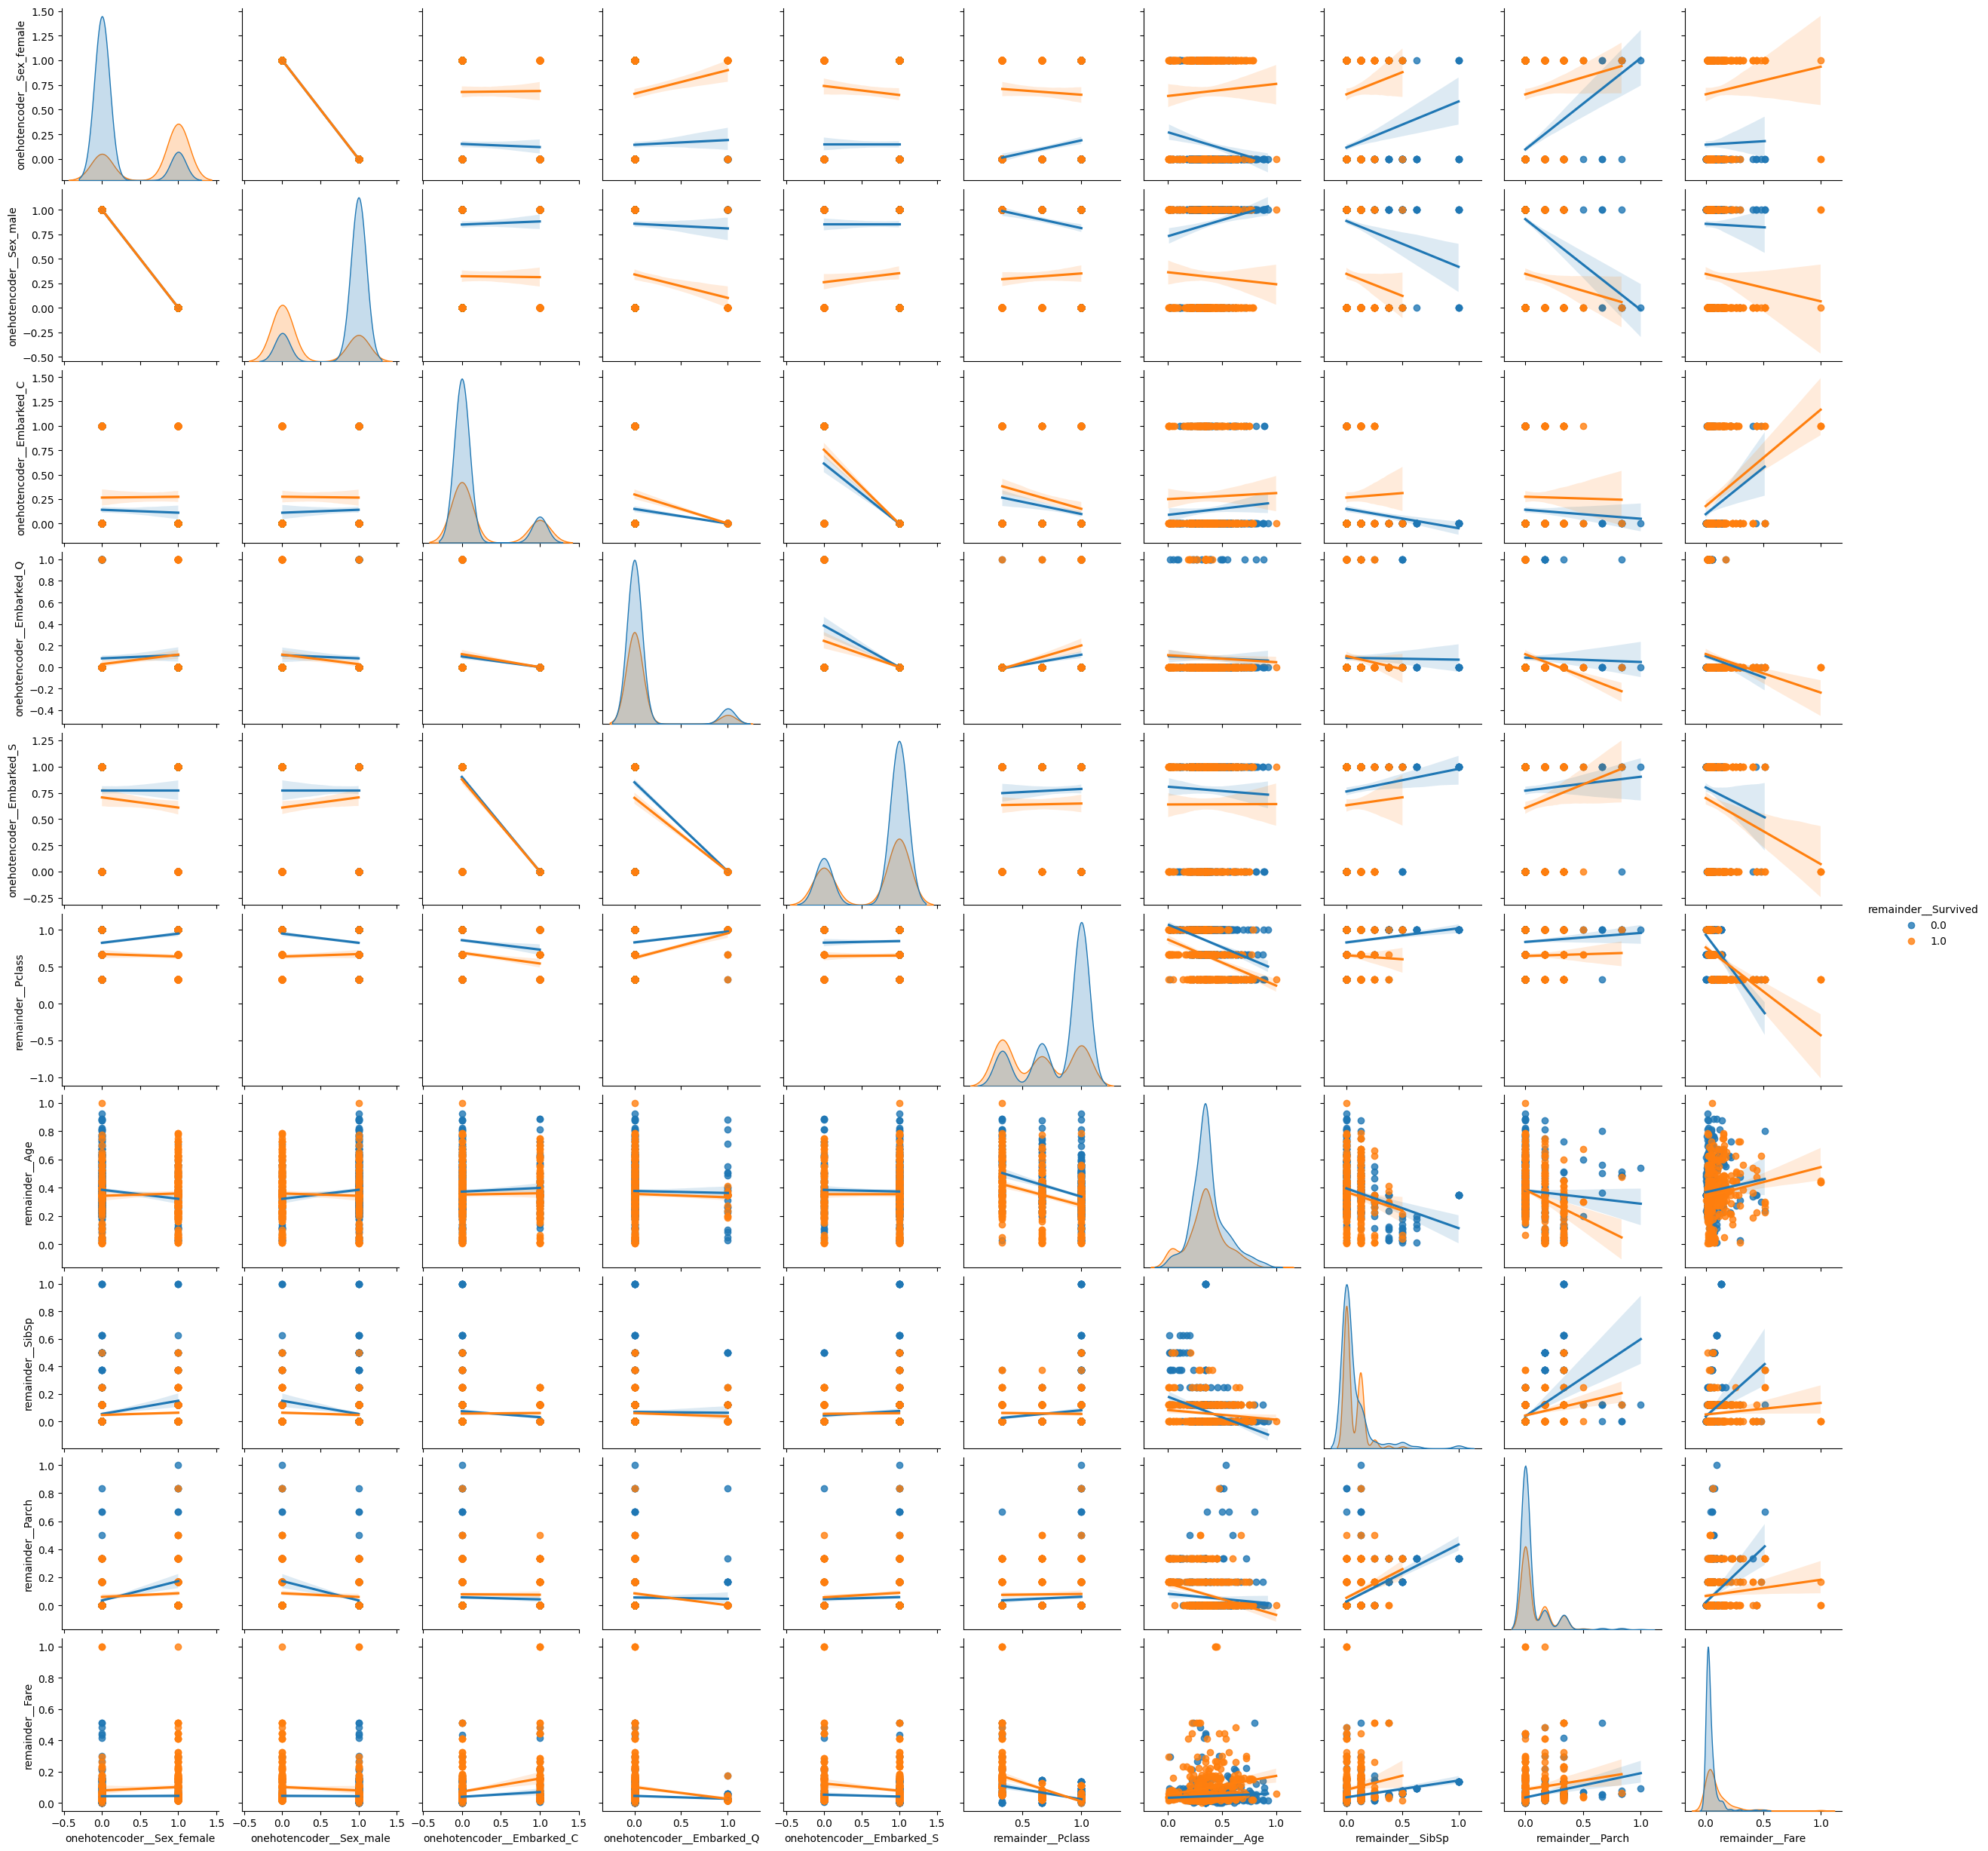

In [10]:
sns.pairplot(X, hue="remainder__Survived", kind='reg')

In [4]:
model = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=1)
model.fit(X, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=1)

In [5]:
X_val = test_data.copy()
X_val.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
X_val['Embarked'] = X_val['Embarked'].fillna(X_val['Embarked'].mode())

X_val = one_hot_enc.fit_transform(X_val)
X_val = pd.DataFrame(X_val, columns=one_hot_enc.get_feature_names_out())
X_val = X_val.fillna(X_val.median())
for column in X_val.columns: 
    X_val[column] = X_val[column]  / X_val[column].abs().max() 

In [6]:
predictions_val = model.predict(X_val)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': model.predict(X_val)})
output.to_csv('./outputs/submission.csv', index=False)